In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
import datetime
import warnings 
warnings.filterwarnings("ignore")

## Part 1 - Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [2]:
# Read the json file into pandas dataframe
logins = pd.read_json('logins.json')

# check the dataframe
logins.head()

login_time
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
2 1970-01-01 20:16:37
3 1970-01-01 20:16:36
4 1970-01-01 20:26:21

In [3]:
# Check the shape of the dataframe
logins.shape

(93142, 1)

In [4]:
logins.describe()

login_time
count                 93142
unique                92265
top     1970-02-12 11:16:53
freq                      3
first   1970-01-01 20:12:16
last    1970-04-13 18:57:38

In [5]:
# check if there is any null values
logins.isna().sum()

login_time    0
dtype: int64

In [6]:
# Aggregate the logins based on 15 min time intervals
logins_15mins = logins.resample('15T', on='login_time').count()


# assign the column name
logins_15mins.columns = ['login_time_counts']

# check the dataframe
print(logins_15mins.head())
print(logins_15mins.tail())

                     login_time_counts
login_time                            
1970-01-01 20:00:00                  2
1970-01-01 20:15:00                  6
1970-01-01 20:30:00                  9
1970-01-01 20:45:00                  7
1970-01-01 21:00:00                  1
                     login_time_counts
login_time                            
1970-04-13 17:45:00                  5
1970-04-13 18:00:00                  5
1970-04-13 18:15:00                  2
1970-04-13 18:30:00                  7
1970-04-13 18:45:00                  6


In [7]:
logins_15mins.sort_values(by='login_time_counts', ascending=False)

login_time_counts
login_time                            
1970-03-01 04:30:00                 73
1970-04-04 05:30:00                 66
1970-04-04 01:30:00                 64
1970-04-04 01:15:00                 63
1970-04-01 23:30:00                 60
...                                ...
1970-01-11 09:45:00                  0
1970-02-16 08:15:00                  0
1970-01-27 08:30:00                  0
1970-01-27 08:15:00                  0
1970-02-11 06:45:00                  0

[9788 rows x 1 columns]

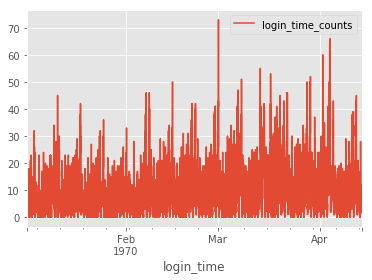

In [8]:
logins_15mins.plot()

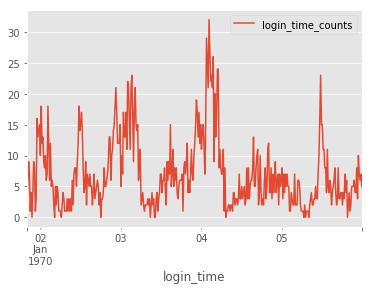

In [9]:
# taking a sample for better visualization
logins_15mins.head(400).plot()

##### The plots above for 15 min time interval show that there is a fluctuation on login times for different times of the day.

In [10]:
logins_15mins.tail()

login_time_counts
login_time                            
1970-04-13 17:45:00                  5
1970-04-13 18:00:00                  5
1970-04-13 18:15:00                  2
1970-04-13 18:30:00                  7
1970-04-13 18:45:00                  6

In [11]:
logins_15mins.index

DatetimeIndex(['1970-01-01 20:00:00', '1970-01-01 20:15:00',
               '1970-01-01 20:30:00', '1970-01-01 20:45:00',
               '1970-01-01 21:00:00', '1970-01-01 21:15:00',
               '1970-01-01 21:30:00', '1970-01-01 21:45:00',
               '1970-01-01 22:00:00', '1970-01-01 22:15:00',
               ...
               '1970-04-13 16:30:00', '1970-04-13 16:45:00',
               '1970-04-13 17:00:00', '1970-04-13 17:15:00',
               '1970-04-13 17:30:00', '1970-04-13 17:45:00',
               '1970-04-13 18:00:00', '1970-04-13 18:15:00',
               '1970-04-13 18:30:00', '1970-04-13 18:45:00'],
              dtype='datetime64[ns]', name='login_time', length=9788, freq='15T')

In [12]:
print(logins_15mins.head())
print(logins_15mins.tail())

                     login_time_counts
login_time                            
1970-01-01 20:00:00                  2
1970-01-01 20:15:00                  6
1970-01-01 20:30:00                  9
1970-01-01 20:45:00                  7
1970-01-01 21:00:00                  1
                     login_time_counts
login_time                            
1970-04-13 17:45:00                  5
1970-04-13 18:00:00                  5
1970-04-13 18:15:00                  2
1970-04-13 18:30:00                  7
1970-04-13 18:45:00                  6


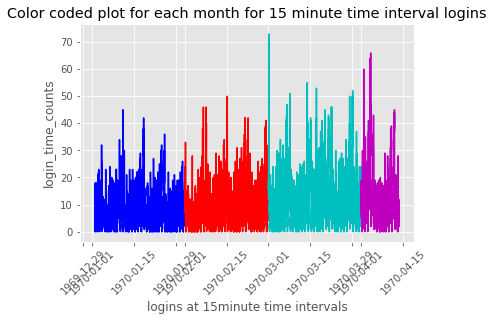

In [13]:
# Let's plot monlthly data in different colors
plt.plot(logins_15mins['1970-01-01':'1970-01-31'],'b')
plt.plot(logins_15mins['1970-02-01':'1970-02-28'],'r')
plt.plot(logins_15mins['1970-03-01':'1970-03-31'],'c')
plt.plot(logins_15mins['1970-04-01':],'m')
plt.xticks(rotation=45)
plt.xlabel('logins at 15minute time intervals')
plt.ylabel('login_time_counts')
plt.title('Color coded plot for each month for 15 minute time interval logins')
plt.show()

##### The above color coded plot of 15-min time interval shows that although the login times fluctuate based on the time of the day, it seems that the login times counts increase slightly during latter months.

In [14]:
# Aggregate the logins based on daily  intervals
logins_daily = logins.resample('D', on='login_time').count()


# assign the column name
logins_daily.columns = ['login_time_counts']

# check the dataframe
print(logins_daily.head())
print(logins_daily.tail())

            login_time_counts
login_time                   
1970-01-01                112
1970-01-02                681
1970-01-03                793
1970-01-04                788
1970-01-05                459
            login_time_counts
login_time                   
1970-04-09                818
1970-04-10               1009
1970-04-11               1352
1970-04-12               1409
1970-04-13                395


In [15]:
# Aggregate the logins based on weekly  intervals
logins_weekly = logins.resample('W', on='login_time').count()


# assign the column name
logins_weekly.columns = ['login_time_counts']

# check the dataframe
print(logins_weekly.head())
print(logins_weekly.tail())

            login_time_counts
login_time                   
1970-01-04               2374
1970-01-11               5217
1970-01-18               5023
1970-01-25               4751
1970-02-01               4744
            login_time_counts
login_time                   
1970-03-22               8955
1970-03-29               7285
1970-04-05               8095
1970-04-12               6491
1970-04-19                395


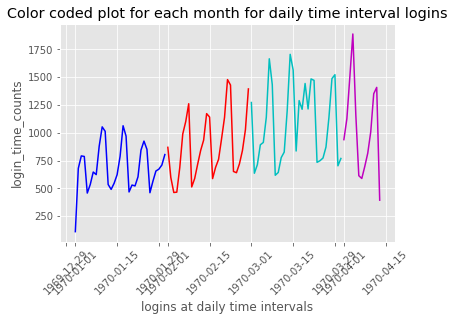

In [16]:
# Let's plot monlthly data in different colors
plt.plot(logins_daily['1970-01-01':'1970-01-31'],'b')
plt.plot(logins_daily['1970-02-01':'1970-02-28'],'r')
plt.plot(logins_daily['1970-03-01':'1970-03-31'],'c')
plt.plot(logins_daily['1970-04-01':],'m')
plt.xticks(rotation=45)
plt.xlabel('logins at daily time intervals')
plt.ylabel('login_time_counts')
plt.title('Color coded plot for each month for daily time interval logins')
plt.show()

##### The above color coded plot of daily interval logins shows that  the login times counts increase slightly during latter months, peaking at first week of April, then decreasing in second week of April.

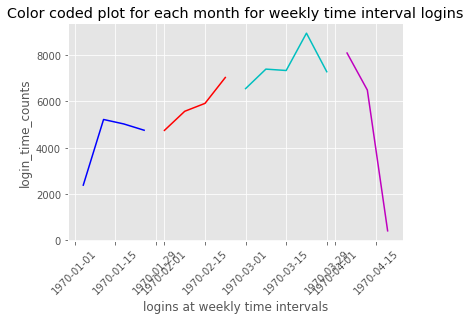

In [17]:
# Let's plot monlthly data in different colors
plt.plot(logins_weekly['1970-01-01':'1970-01-31'],'b')
plt.plot(logins_weekly['1970-02-01':'1970-02-28'],'r')
plt.plot(logins_weekly['1970-03-01':'1970-03-31'],'c')
plt.plot(logins_weekly['1970-04-01':],'m')
plt.xticks(rotation=45)
plt.xlabel('logins at weekly time intervals')
plt.ylabel('login_time_counts')
plt.title('Color coded plot for each month for weekly time interval logins')
plt.show()

In [18]:
# Aggregate the logins based on weekday
logins_15mins['weekday'] = logins_15mins.index.weekday
logins_15mins.head()

login_time_counts  weekday
login_time                                     
1970-01-01 20:00:00                  2        3
1970-01-01 20:15:00                  6        3
1970-01-01 20:30:00                  9        3
1970-01-01 20:45:00                  7        3
1970-01-01 21:00:00                  1        3

In [19]:
logins_weekday = logins_15mins.groupby('weekday').sum()
logins_weekday.head()

login_time_counts
weekday                   
0                     8823
1                     9268
2                    10339
3                    11960
4                    15208

In [20]:
logins_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
logins_weekday.head()

login_time_counts
Mon                 8823
Tues                9268
Wed                10339
Thurs              11960
Fri                15208

Text(0.5, 0, 'Days of the Week')

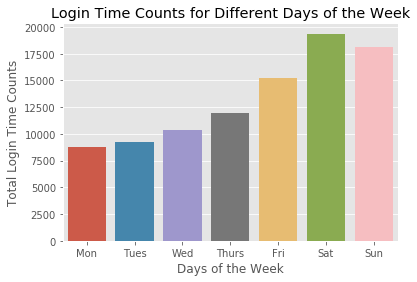

In [21]:
sns.barplot(x='index', y='login_time_counts', data=logins_weekday.reset_index())
plt.title('Login Time Counts for Different Days of the Week')
plt.ylabel('Total Login Time Counts')
plt.xlabel('Days of the Week')

##### The above  bar graph shows that weekends tend to have higher rate of logins compared to the weekdays.

Text(0.5, 0, 'Hours of Day')

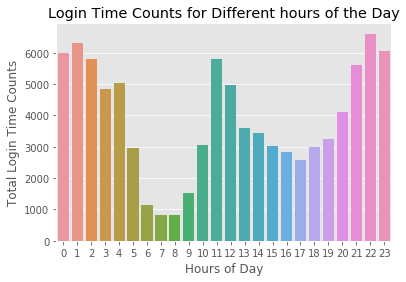

In [22]:
# Aggregate the logins based on hours
logins_15mins['hour'] = logins_15mins.index.hour

hourly = logins_15mins.drop('weekday', axis=1).groupby('hour').sum()

sns.barplot(x='hour', y='login_time_counts', data=hourly.reset_index())
plt.title('Login Time Counts for Different hours of the Day')
plt.ylabel('Total Login Time Counts')
plt.xlabel('Hours of Day')

##### Upon breakingdown the login time counts to different hours of the day, it shows bimodal pattern one peaking around midnight and the other around noon.

In [23]:
# Now let's separate the hours by weekend and weekdays
weekend_or_weekday = np.where(logins_15mins.weekday < 5, 'WeekDay', 'WeekEnd')
wknd_wkdy_time = logins_15mins.groupby([weekend_or_weekday, logins_15mins.index.time]).mean()
print(wknd_wkdy_time.head())
print(wknd_wkdy_time.tail())
print(wknd_wkdy_time.info())

                  login_time_counts  weekday  hour
WeekDay 00:00:00          12.250000      2.0   0.0
        00:15:00          13.111111      2.0   0.0
        00:30:00          12.708333      2.0   0.0
        00:45:00          12.152778      2.0   0.0
        01:00:00          12.680556      2.0   1.0
                  login_time_counts  weekday  hour
WeekEnd 22:45:00          15.300000      5.5  22.0
        23:00:00          13.133333      5.5  23.0
        23:15:00          13.100000      5.5  23.0
        23:30:00          12.566667      5.5  23.0
        23:45:00          13.300000      5.5  23.0
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 192 entries, (WeekDay, 00:00:00) to (WeekEnd, 23:45:00)
Data columns (total 3 columns):
login_time_counts    192 non-null float64
weekday              192 non-null float64
hour                 192 non-null float64
dtypes: float64(3)
memory usage: 5.7+ KB
None


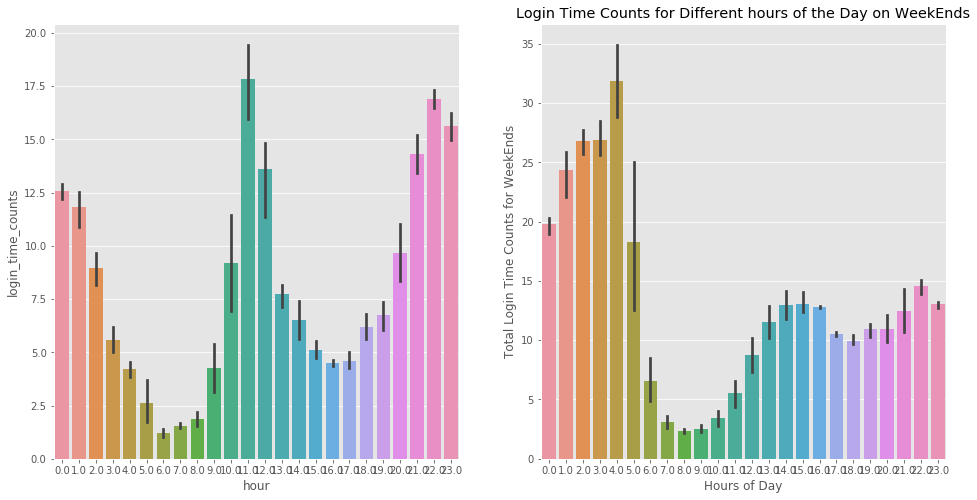

In [24]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

sns.barplot(x='hour', y='login_time_counts', 
            data=wknd_wkdy_time.loc['WeekDay'].reset_index(), ax=ax[0])
plt.title('Login Time Counts for Different hours of the Day on WeekDays')
plt.ylabel('Total Login Time Counts for WeekDays')
plt.xlabel('Hours of Day')


sns.barplot(x='hour', y='login_time_counts', 
            data=wknd_wkdy_time.loc['WeekEnd'].reset_index(), ax=ax[1])
plt.title('Login Time Counts for Different hours of the Day on WeekEnds')
plt.ylabel('Total Login Time Counts for WeekEnds')
plt.xlabel('Hours of Day')
plt.show()

##### When the hourly breakdown was further broken down into weekday and weekend, the pattern shows starking differnce in the peak login hours.

## Part 2: Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

##### Answer 1: The key measure for this experiment in my opinion would be the toll usage. As the question mentions circadian rhythms for Gotham and Metropolis, I would like to track that to see if  it changes with the reimbursement of the tolls. 

##### Answer 2a: I would propose A/B testing. For this I would trial the reimbursement of tolls for a given period, for example one month or two months etc for one city and not in the other city which will serve as a control. Then after the trial period swap the trial. I would then analyze the pattern of bridge crossings. Alternatively, instead of taking one city as control and other as test, we can randomize the drivers from both cities into two groups:- test and control and monitor the bridge crossings.

##### Answer 2b: I would use t-test to test:- (i) Bridge crossings into Gotham during night, (ii) Bridge crossings into Metropolis during day, and (iii) Bridge crossings in both directions during weekends.

##### Answer 2c: If the incentive of reimbursing tolls does result in change of activity, then it suggests that the system is working. If the change is not very significant or no change at all, then probably just the reimbursement of tolls is not working and we need to provide something else for encouraging the drivers. I would propose, in addition to reimbursement of tolls, to provide extra incentive for crossing the bridge, say 10% extra if crossed into other city during the hours other than peak hours. Reimbursement of tolls plus extra bonus would probably be enough to attract the drivers into other city. 

## Part 3 - Predictive Modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm
rider retention (again, a few sentences will suffice).


### Data description
● __city:__ city this user signed up in

● __phone:__ primary device for this user

● __signup_date:__ date of account registration; in the form ‘YYYY MM DD’

● __last_trip_date:__ the last time this user completed a trip; in the form ‘YYYY MM DD’

● __avg_dist:__ the average distance in miles per trip taken in the first 30 days after signup

● __avg_rating_by_driver:__ the rider’s average rating over all of their trips

● __avg_rating_of_driver:__ the rider’s average rating of their drivers over all of their trips

● __surge_pct:__ the percent of trips taken with surge multiplier > 1

● __avg_surge:__ The average surge multiplier over all of this user’s trips

● __trips_in_first_30_days:__ the number of trips this user took in the first 30 days after
signing up

● __ultimate_black_user:__ TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise

● __weekday_pct:__ the percent of the user’s trips occurring during a weekday

In [25]:
import json

df = json.load(open('ultimate_data_challenge.json'))
retain_df = pd.DataFrame(df)
retain_df.head()

city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                 True   
1       1.00     2014-05-05  Android        0.0                False   
2       1.00     2014-01-07   iPhone        0.0                False   
3       1.14     2014-06-29   iPhone       20.0                 True   
4       1.19     2014-03-15  Android       11.8                False   

   weekday_pct  avg_dist  avg_rating_by_driver  
0         46.2      3.67                   5.0  
1         50.0      8.26                   5.0  
2        100.0      0.77                   5.0  
3         80.0      2.36                   4.9  
4         82.4      3.13                   4.9

In [26]:
retain_df.shape

(50000, 12)

In [27]:
retain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [28]:
# convert the time series
retain_df['signup_date'] = pd.to_datetime(retain_df['signup_date'])
retain_df['last_trip_date'] = pd.to_datetime(retain_df['last_trip_date'])

In [29]:
# counting how many cities are there
retain_df.city.value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [30]:
# counting phones
retain_df.phone.value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [31]:
print('Percentage of riders by city:\n', (retain_df.city.value_counts()/retain_df.shape[0])*100)
print('*'*60)
print('Percentage of riders by phone users:\n', (retain_df.phone.value_counts()/retain_df.shape[0])*100)

Percentage of riders by city:
 Winterfell        46.672
Astapor           33.068
King's Landing    20.260
Name: city, dtype: float64
************************************************************
Percentage of riders by phone users:
 iPhone     69.164
Android    30.044
Name: phone, dtype: float64


In [32]:
# now let's calculate the retention (i.e. target variable)
last_day = max(retain_df['last_trip_date'])
days = pd.date_range(end=last_day, periods=30, freq='D')
retain_df['rider'] = retain_df['last_trip_date'].map(lambda active: 'active' if active in days else 'inactive')
retain_df.head()

city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                 True   
1       1.00     2014-05-05  Android        0.0                False   
2       1.00     2014-01-07   iPhone        0.0                False   
3       1.14     2014-06-29   iPhone       20.0                 True   
4       1.19     2014-03-15  Android       11.8                False   

   weekday_pct  avg_dist  avg_rating_by_driver     rider  
0         46.2      3.67                   5.0    active  
1         50.0      8.26                   5.0  inactive  
2        100.0      0.77                   5.0  inactive  
3         80.0      2.36                   4.9    active  
4         82.4      3.13                   4.9  inactive

In [33]:
# Let's calculate the proportion of retained riders
active_riders_percent = len(retain_df[retain_df.rider == 'active']) / len(retain_df)
print('The proportion of the retained riders: %.2f' % (active_riders_percent*100),'%')

The proportion of the retained riders: 36.62 %


Text(0.5, 1.0, 'Rider retention percent by City')

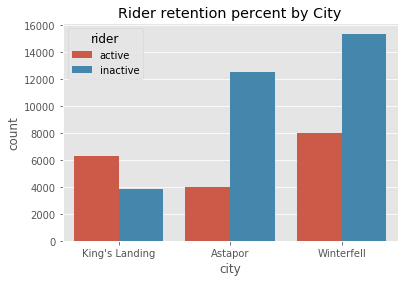

In [34]:
# Let's look at the rider retention based on cities
sns.countplot(x='city', hue='rider', data=retain_df)
plt.title('Rider retention percent by City')

Text(0.5, 1.0, 'Rider retention percent by Ultimate Black Users')

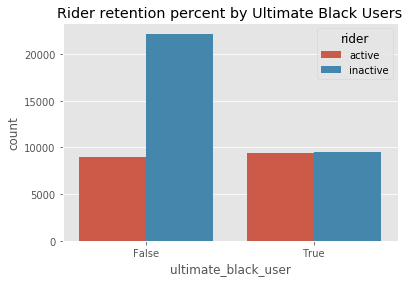

In [35]:
sns.countplot(x='ultimate_black_user', hue='rider', data=retain_df)
plt.title('Rider retention percent by Ultimate Black Users')

Text(0.5, 1.0, 'Rider retention percent by phone users')

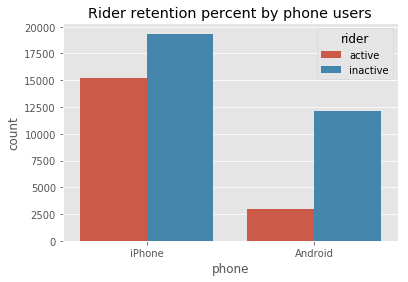

In [36]:
sns.countplot(x='phone', hue='rider', data=retain_df)
plt.title('Rider retention percent by phone users')

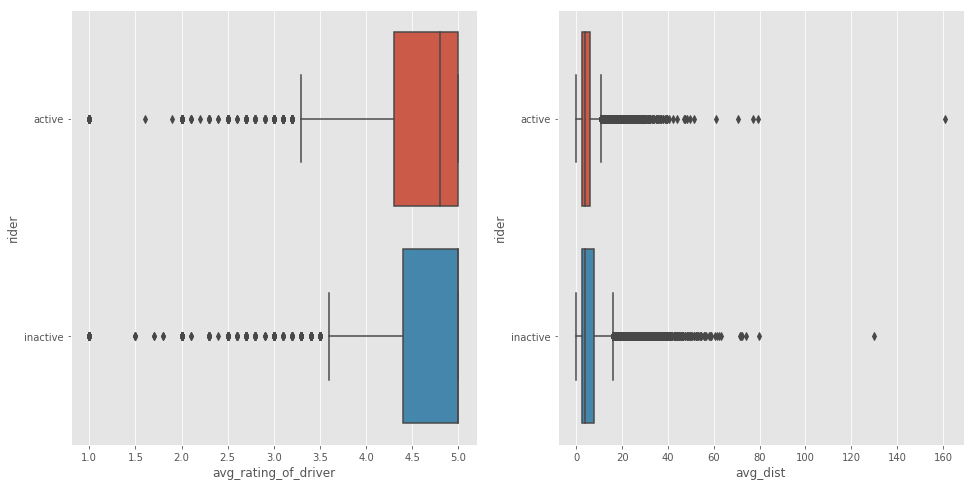

In [37]:
# now let's check the rider retention by ratings and avg_dist
fig, ax = plt.subplots(1,2,figsize=(16,8))
sns.boxplot(x='avg_rating_of_driver', y='rider', data=retain_df, ax=ax[0])
sns.boxplot(x='avg_dist', y='rider', data=retain_df, ax=ax[1])

(-1, 20)

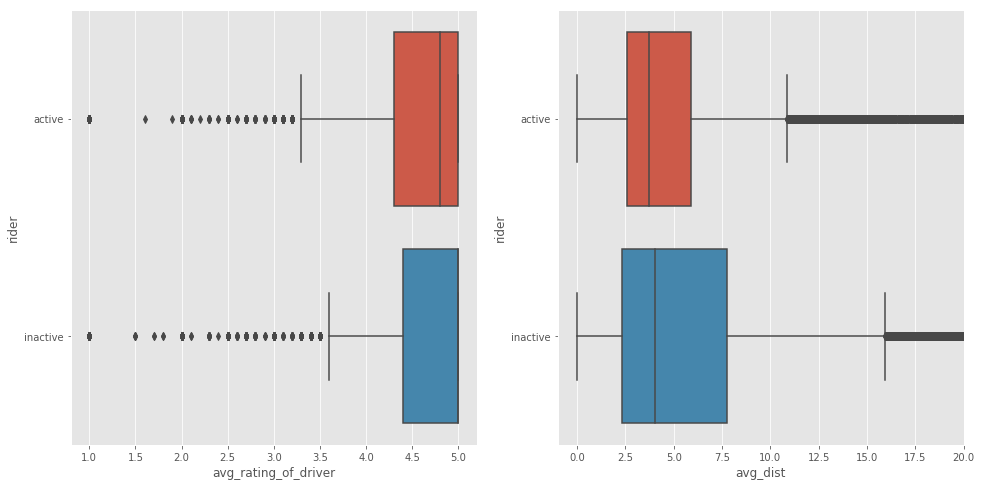

In [38]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
sns.boxplot(x='avg_rating_of_driver', y='rider', data=retain_df, ax=ax[0])
plt.xlim(4.2,5.1)
sns.boxplot(x='avg_dist', y='rider', data=retain_df, ax=ax[1])
plt.xlim(-1,20)

(4.2, 5.1)

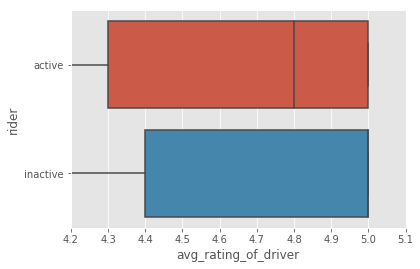

In [39]:
sns.boxplot(x='avg_rating_of_driver', y='rider', data=retain_df)
plt.xlim(4.2,5.1)

(-1, 20)

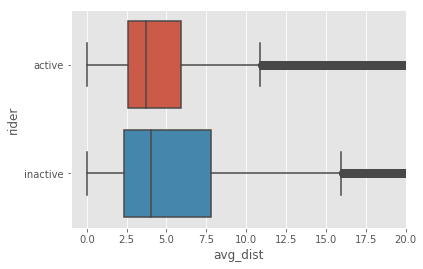

In [40]:
sns.boxplot(x='avg_dist', y='rider', data=retain_df)
plt.xlim(-1,20)

In [41]:
retain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null datetime64[ns]
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
rider                     50000 non-null object
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(3)
memory usage: 4.6+ MB


In [42]:
# Let's convert target variable (rider) into numerical
retain_df.rider = (retain_df.rider == 'active').astype(int)
retain_df.head()

city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                 True   
1       1.00     2014-05-05  Android        0.0                False   
2       1.00     2014-01-07   iPhone        0.0                False   
3       1.14     2014-06-29   iPhone       20.0                 True   
4       1.19     2014-03-15  Android       11.8                False   

   weekday_pct  avg_dist  avg_rating_by_driver  rider  
0         46.2      3.67                   5.0      1  
1         50.0      8.26                   5.0      0  
2        100.0      0.77                   5.0      0  
3         80.0      2.36                   4.9      1  
4         82.4      3.13                   4.9      0

In [43]:
retain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null datetime64[ns]
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
rider                     50000 non-null int64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(2), object(2)
memory usage: 4.6+ MB


In [44]:
# There are null values in 'avg_rating_of_driver', 'phone', and 'avg_rating_by_driver'
retain_df['avg_rating_by_driver'].fillna(retain_df['avg_rating_by_driver'].mean(), inplace=True)
retain_df['avg_rating_of_driver'].fillna(retain_df['avg_rating_of_driver'].mean(), inplace=True)
retain_df['phone'].fillna('iPhone', inplace=True)

In [45]:
retain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null datetime64[ns]
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
rider                     50000 non-null int64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(2), object(2)
memory usage: 4.6+ MB


In [46]:
retain_df.shape

(50000, 13)

In [47]:
# drop the columns not needed
retain_df.drop(['last_trip_date', 'signup_date'], axis=1, inplace=True)
retain_df.head()

city  trips_in_first_30_days  avg_rating_of_driver  avg_surge  \
0  King's Landing                       4                   4.7       1.10   
1         Astapor                       0                   5.0       1.00   
2         Astapor                       3                   4.3       1.00   
3  King's Landing                       9                   4.6       1.14   
4      Winterfell                      14                   4.4       1.19   

     phone  surge_pct  ultimate_black_user  weekday_pct  avg_dist  \
0   iPhone       15.4                 True         46.2      3.67   
1  Android        0.0                False         50.0      8.26   
2   iPhone        0.0                False        100.0      0.77   
3   iPhone       20.0                 True         80.0      2.36   
4  Android       11.8                False         82.4      3.13   

   avg_rating_by_driver  rider  
0                   5.0      1  
1                   5.0      0  
2                   5.0      0  
3                   4.9      1  
4                   4.9      0

In [48]:
retain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
phone                     50000 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
rider                     50000 non-null int64
dtypes: bool(1), float64(6), int64(2), object(2)
memory usage: 3.9+ MB


In [49]:
retain_df.shape

(50000, 11)

In [50]:
# convert ultimate_black_user from bool into numerical
retain_df.ultimate_black_user = (retain_df.ultimate_black_user).astype(int)
retain_df.head()

city  trips_in_first_30_days  avg_rating_of_driver  avg_surge  \
0  King's Landing                       4                   4.7       1.10   
1         Astapor                       0                   5.0       1.00   
2         Astapor                       3                   4.3       1.00   
3  King's Landing                       9                   4.6       1.14   
4      Winterfell                      14                   4.4       1.19   

     phone  surge_pct  ultimate_black_user  weekday_pct  avg_dist  \
0   iPhone       15.4                    1         46.2      3.67   
1  Android        0.0                    0         50.0      8.26   
2   iPhone        0.0                    0        100.0      0.77   
3   iPhone       20.0                    1         80.0      2.36   
4  Android       11.8                    0         82.4      3.13   

   avg_rating_by_driver  rider  
0                   5.0      1  
1                   5.0      0  
2                   5.0      0  
3                   4.9      1  
4                   4.9      0

In [51]:
retain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
phone                     50000 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null int64
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
rider                     50000 non-null int64
dtypes: float64(6), int64(3), object(2)
memory usage: 4.2+ MB


In [52]:
y = retain_df.rider

X = retain_df.drop(['rider'], axis=1)

In [53]:
# get dummy variables
X = X.drop(['phone'], axis=1)

phone = pd.get_dummies(retain_df.phone, drop_first=False) # I did not drop any columns for phone, because zero might result in NANs.
city = pd.get_dummies(retain_df.city, drop_first=True) # I dropped a city for the city metric

X = pd.get_dummies(X, drop_first=False)
X['Android'] = phone.Android
X['iPhone'] = phone.iPhone

X.head()

trips_in_first_30_days  avg_rating_of_driver  avg_surge  surge_pct  \
0                       4                   4.7       1.10       15.4   
1                       0                   5.0       1.00        0.0   
2                       3                   4.3       1.00        0.0   
3                       9                   4.6       1.14       20.0   
4                      14                   4.4       1.19       11.8   

   ultimate_black_user  weekday_pct  avg_dist  avg_rating_by_driver  \
0                    1         46.2      3.67                   5.0   
1                    0         50.0      8.26                   5.0   
2                    0        100.0      0.77                   5.0   
3                    1         80.0      2.36                   4.9   
4                    0         82.4      3.13                   4.9   

   city_Astapor  city_King's Landing  city_Winterfell  Android  iPhone  
0             0                    1                0        0       1  
1             1                    0                0        1       0  
2             1                    0                0        0       1  
3             0                    1                0        0       1  
4             0                    0                1        1       0

In [54]:
X.tail()

trips_in_first_30_days  avg_rating_of_driver  avg_surge  surge_pct  \
49995                       0              5.000000        1.0        0.0   
49996                       1              4.601559        1.0        0.0   
49997                       0              5.000000        1.0        0.0   
49998                       2              3.000000        1.0        0.0   
49999                       0              4.601559        1.0        0.0   

       ultimate_black_user  weekday_pct  avg_dist  avg_rating_by_driver  \
49995                    0        100.0      5.63                   4.2   
49996                    0          0.0      0.00                   4.0   
49997                    1        100.0      3.86                   5.0   
49998                    0        100.0      4.58                   3.5   
49999                    0          0.0      3.49                   5.0   

       city_Astapor  city_King's Landing  city_Winterfell  Android  iPhone  
49995             0                    1                0        0       1  
49996             1                    0                0        0       1  
49997             0                    0                1        1       0  
49998             1                    0                0        0       1  
49999             1                    0                0        1       0

In [55]:
y.shape

(50000,)

In [56]:
X.shape

(50000, 13)

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC, LinearSVC

In [58]:
# train test split the data
Xtrain, Xtest, ytrain, ytest = train_test_split(X.values, y.values, test_size=0.2, random_state=21)

### Logistic Regression

In [59]:
# Instantiate logistic regression
logreg = LogisticRegression()

# fit on the training data
logreg.fit(Xtrain,ytrain)

# accuracy score
print("acccuracy_score: ", accuracy_score(logreg.predict(Xtest), ytest))

acccuracy_score:  0.7191


In [60]:
grid = [0.001, 0.01, 0.1, 1, 10, 100]

param_grid = {'C': grid}


logreg_cv = GridSearchCV(logreg, param_grid=param_grid, cv=5)

logreg_cv.fit(X.values, y.values)

print("Best parameters:", logreg_cv.best_params_)
print("Best score:", logreg_cv.best_score_)

clf_best = LogisticRegression(C=logreg_cv.best_params_['C'])
clf_best.fit(Xtrain,ytrain)
print("Accuracy score:", accuracy_score(clf_best.predict(Xtest),ytest))

Best parameters: {'C': 0.01}
Best score: 0.72462
Accuracy score: 0.72


##### The accuracy score increased with GridSearchCV so I'll use this one below

In [61]:
clf = LogisticRegression(C=0.01) # best parameter from above

# Now fit the model of the training data
clf.fit(Xtrain, ytrain)

ylr_pred = clf.predict(Xtest)

# print the accuracy and confusion matrix
print('accuracy score: ', accuracy_score(ylr_pred, ytest))
print('*'*30)
print('Confusion matrix: ', confusion_matrix(ytest, ylr_pred))
print('*'*30)
print(classification_report(y_true=ytest, y_pred= ylr_pred))

accuracy score:  0.72
******************************
Confusion matrix:  [[5476  844]
 [1956 1724]]
******************************
              precision    recall  f1-score   support

           0       0.74      0.87      0.80      6320
           1       0.67      0.47      0.55      3680

   micro avg       0.72      0.72      0.72     10000
   macro avg       0.70      0.67      0.67     10000
weighted avg       0.71      0.72      0.71     10000



In [62]:
logreg_feature_importance = pd.DataFrame(np.transpose(clf.coef_), index = X.columns, columns=['feature_importance']).reset_index()
logreg_feature_importance.columns = ['feature_name', 'logreg_feature_importance']
logreg_feature_importance.set_index('feature_name', inplace=True)
logreg_feature_importance

logreg_feature_importance
feature_name                                     
trips_in_first_30_days                   0.124165
avg_rating_of_driver                    -0.054438
avg_surge                               -0.110466
surge_pct                                0.003073
ultimate_black_user                      0.837178
weekday_pct                              0.000714
avg_dist                                -0.035756
avg_rating_by_driver                    -0.164554
city_Astapor                            -0.741422
city_King's Landing                      0.949340
city_Winterfell                         -0.223113
Android                                 -0.559445
iPhone                                   0.544250

### K-Nearest Neighbors

In [63]:
knn = KNeighborsClassifier(leaf_size = 10)
knn.fit(Xtrain, ytrain)
clf_knn = knn.predict(Xtest)
# print the accuracy and confusion matrix
print('accuracy score: ', accuracy_score(clf_knn, ytest))
print('*'*30)
print('Confusion matrix: ', confusion_matrix(ytest, clf_knn))
print('*'*30)
print(classification_report(y_true=ytest, y_pred= clf_knn))

accuracy score:  0.7464
******************************
Confusion matrix:  [[5197 1123]
 [1413 2267]]
******************************
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      6320
           1       0.67      0.62      0.64      3680

   micro avg       0.75      0.75      0.75     10000
   macro avg       0.73      0.72      0.72     10000
weighted avg       0.74      0.75      0.74     10000



### Support Vector Machine

In [64]:
# Instantiate linear SVM
svm = LinearSVC()

# Fit on the training data
svm.fit(Xtrain, ytrain)

svm_clf = svm.predict(Xtest)

# print the accuracy and confusion matrix
print('accuracy score: ', accuracy_score(svm_clf, ytest))
print('*'*30)
print('Confusion matrix: ', confusion_matrix(ytest, svm_clf))
print('*'*30)
print(classification_report(y_true=ytest, y_pred= svm_clf))

accuracy score:  0.5096
******************************
Confusion matrix:  [[1748 4572]
 [ 332 3348]]
******************************
              precision    recall  f1-score   support

           0       0.84      0.28      0.42      6320
           1       0.42      0.91      0.58      3680

   micro avg       0.51      0.51      0.51     10000
   macro avg       0.63      0.59      0.50     10000
weighted avg       0.69      0.51      0.48     10000



In [65]:
svm_feature_importance = pd.DataFrame(np.transpose(svm.coef_), index = X.columns, columns=['feature_importance']).reset_index()
svm_feature_importance.columns = ['feature_name', 'svm_feature_importance']
svm_feature_importance.set_index('feature_name', inplace=True)
svm_feature_importance

svm_feature_importance
feature_name                                  
trips_in_first_30_days                0.044131
avg_rating_of_driver                 -0.019762
avg_surge                            -0.077337
surge_pct                             0.014267
ultimate_black_user                   0.306796
weekday_pct                           0.014792
avg_dist                             -0.011995
avg_rating_by_driver                 -0.027576
city_Astapor                         -0.348508
city_King's Landing                   0.344887
city_Winterfell                      -0.155137
Android                              -0.266721
iPhone                                0.107963

### Gradient Boosting Classifier

In [66]:
gbc = GradientBoostingClassifier()

gbc.fit(Xtrain, ytrain)

gbc_clf = gbc.predict(Xtest)
# print the accuracy and confusion matrix
print('accuracy score: ', accuracy_score(gbc_clf, ytest))
print('*'*30)
print('Confusion matrix: ', confusion_matrix(ytest, gbc_clf))
print('*'*30)
print(classification_report(y_true=ytest, y_pred= gbc_clf))

accuracy score:  0.7865
******************************
Confusion matrix:  [[5438  882]
 [1253 2427]]
******************************
              precision    recall  f1-score   support

           0       0.81      0.86      0.84      6320
           1       0.73      0.66      0.69      3680

   micro avg       0.79      0.79      0.79     10000
   macro avg       0.77      0.76      0.77     10000
weighted avg       0.78      0.79      0.78     10000



In [67]:
# now lets do gridsearch
parameters = {'learning_rate': [0.1, 0.2, 0.25], 'n_estimators':[100, 150, 200, 250]}
clf = GridSearchCV(gbc, parameters, cv=5, scoring='accuracy')
clf.fit(Xtrain, ytrain)
clf.best_params_

{'learning_rate': 0.25, 'n_estimators': 150}

In [68]:
clf_tuned = GradientBoostingClassifier()
clf_tuned.fit(Xtrain, ytrain)
clf_pred = clf_tuned.predict(Xtest)
# print the accuracy and confusion matrix
print('accuracy score: ', accuracy_score(clf_pred, ytest))
print('*'*30)
print('Confusion matrix: ', confusion_matrix(ytest, clf_pred))
print('*'*30)
print(classification_report(y_true=ytest, y_pred= clf_pred))

accuracy score:  0.7865
******************************
Confusion matrix:  [[5438  882]
 [1253 2427]]
******************************
              precision    recall  f1-score   support

           0       0.81      0.86      0.84      6320
           1       0.73      0.66      0.69      3680

   micro avg       0.79      0.79      0.79     10000
   macro avg       0.77      0.76      0.77     10000
weighted avg       0.78      0.79      0.78     10000



In [69]:
gbc_feature_importance = pd.DataFrame(np.transpose(clf_tuned.feature_importances_), index = X.columns, columns=['feature_importance']).reset_index()
gbc_feature_importance.columns = ['feature_name', 'gbc_feature_importance']
gbc_feature_importance.set_index('feature_name', inplace=True)
gbc_feature_importance

gbc_feature_importance
feature_name                                  
trips_in_first_30_days                0.034058
avg_rating_of_driver                  0.011321
avg_surge                             0.005534
surge_pct                             0.177857
ultimate_black_user                   0.072817
weekday_pct                           0.139006
avg_dist                              0.017028
avg_rating_by_driver                  0.250625
city_Astapor                          0.029627
city_King's Landing                   0.167701
city_Winterfell                       0.000000
Android                               0.050276
iPhone                                0.044150

## Random Forest Classifier

In [70]:
rf = RandomForestClassifier(n_estimators =500)

rf.fit(Xtrain, ytrain)

rf_pred = rf.predict(Xtest)
# print the accuracy and confusion matrix
print('accuracy score: ', accuracy_score(rf_pred, ytest))
print('*'*30)
print('Confusion matrix: ', confusion_matrix(ytest, rf_pred))
print('*'*30)
print(classification_report(y_true=ytest, y_pred= rf_pred))

accuracy score:  0.7572
******************************
Confusion matrix:  [[5134 1186]
 [1242 2438]]
******************************
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      6320
           1       0.67      0.66      0.67      3680

   micro avg       0.76      0.76      0.76     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.76      0.76      0.76     10000



In [71]:
rf_feature_importance = pd.DataFrame(np.transpose(rf.feature_importances_), index = X.columns, columns=['feature_importance']).reset_index()
rf_feature_importance.columns = ['feature_name', 'rf_feature_importance']
rf_feature_importance.set_index('feature_name', inplace=True)

In [72]:
rf_feature_importance

rf_feature_importance
feature_name                                 
trips_in_first_30_days               0.078970
avg_rating_of_driver                 0.081074
avg_surge                            0.067207
surge_pct                            0.079242
ultimate_black_user                  0.032435
weekday_pct                          0.129559
avg_dist                             0.294312
avg_rating_by_driver                 0.116710
city_Astapor                         0.016326
city_King's Landing                  0.051434
city_Winterfell                      0.011218
Android                              0.020667
iPhone                               0.020847

In [73]:
features_combined = pd.concat([logreg_feature_importance, svm_feature_importance, 
                              gbc_feature_importance, rf_feature_importance], axis=1)

In [74]:
features_combined

logreg_feature_importance  svm_feature_importance  \
feature_name                                                                
trips_in_first_30_days                   0.124165                0.044131   
avg_rating_of_driver                    -0.054438               -0.019762   
avg_surge                               -0.110466               -0.077337   
surge_pct                                0.003073                0.014267   
ultimate_black_user                      0.837178                0.306796   
weekday_pct                              0.000714                0.014792   
avg_dist                                -0.035756               -0.011995   
avg_rating_by_driver                    -0.164554               -0.027576   
city_Astapor                            -0.741422               -0.348508   
city_King's Landing                      0.949340                0.344887   
city_Winterfell                         -0.223113               -0.155137   
Android                                 -0.559445               -0.266721   
iPhone                                   0.544250                0.107963   

                        gbc_feature_importance  rf_feature_importance  
feature_name                                                           
trips_in_first_30_days                0.034058               0.078970  
avg_rating_of_driver                  0.011321               0.081074  
avg_surge                             0.005534               0.067207  
surge_pct                             0.177857               0.079242  
ultimate_black_user                   0.072817               0.032435  
weekday_pct                           0.139006               0.129559  
avg_dist                              0.017028               0.294312  
avg_rating_by_driver                  0.250625               0.116710  
city_Astapor                          0.029627               0.016326  
city_King's Landing                   0.167701               0.051434  
city_Winterfell                       0.000000               0.011218  
Android                               0.050276               0.020667  
iPhone                                0.044150               0.020847

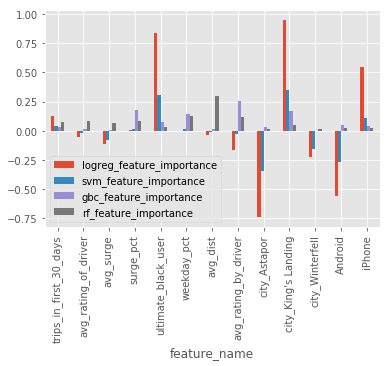

In [75]:
features_combined.plot.bar()

##### Answer 3a: 36.62% of riders were retained (i.e. made a trip in the last 30 days).

##### Answer 3b: I used five models: logistic regression, KNN, Linear SVM, Gradient Boosting Classifier and Random Forest Classifier. I chose these because they allow an examination of the contribution of each feature to the prediction. I used accuracy to get a good sense of how my model was doing. Based on accuracy score, gradient boosting classifier performed the best followed by random forest classifier, which was further corroborated by confusion matrices.

##### Answer 3c: Now that we chose a model, Ultimate can use this to increase their retainment rate. The riders that were classified as negative could be provided attractive offers in order to retain them. As shown in the above plot (combined features), King's Landing was the only city with more retention than lost compared to other two cities. So Ultimate can now focus on other two cities more. Furthermore it looks like there are more iPhone users than Android, so Ultimate can further investigate the reason, which could be the performance of app for iPhone vs Android.